In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy import stats



import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/juliacalma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [38]:
# Load the dataset into a DataFrame
mymatern = pd.read_csv("Maternal Health Risk Data Set.csv")

# View dimensions of the dataset (number of rows, number of columns)
print("Data Shape:", mymatern.shape)

#data info
print("\n\nData Information:")
print(mymatern.info())

# Preview the first few rows of the DataFrame
print("\n\nFirst few rows:")
mymatern.head()

Data Shape: (1014, 7)


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


First few rows:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [39]:
#Summary Stats
print("Summary Staistics:")
mymatern.describe()

Summary Staistics:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [40]:
#Perform an initial exploration of the provided dataset to assess its cleanliness.Describethe steps taken to address both data cleanliness evaluation and data cleaning strategies.


#Check the number of missing values
print("Missing values in the dataset:")
print(mymatern.isnull().sum())


# Find duplicates based on all columns
duplicates = mymatern.duplicated(keep=False)
num_duplicates = duplicates.sum()
print("\n\nNumber of duplicates:",num_duplicates)


Missing values in the dataset:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


Number of duplicates: 866


Numerical Columns: ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


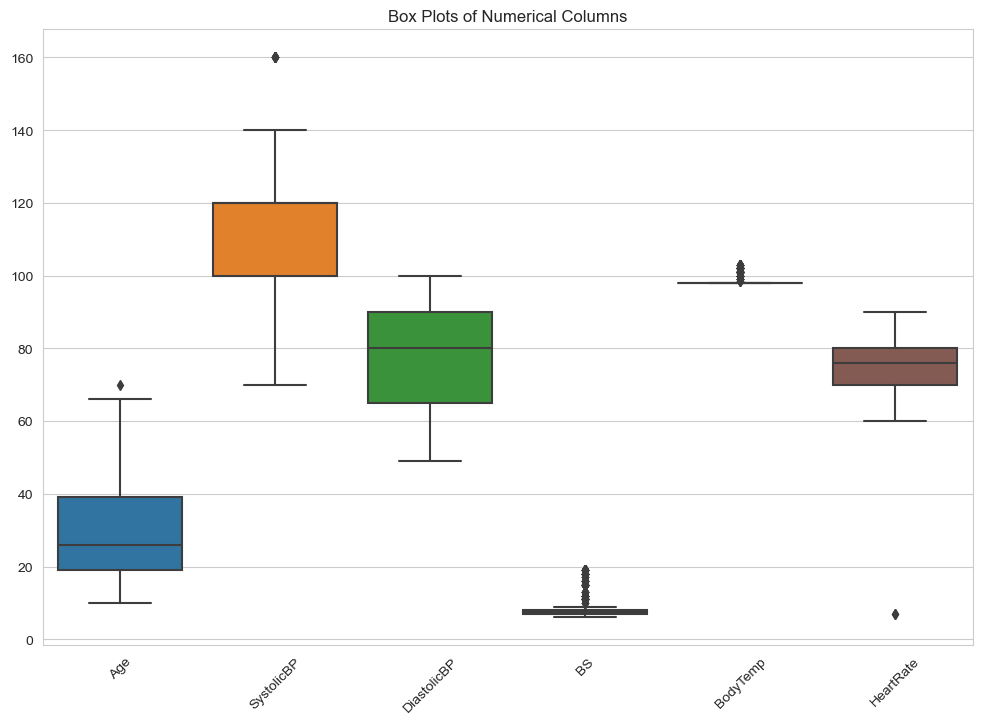

In [41]:
#Illustrate the features of your dataset using meaningful boxplots, histograms and grouped scatter plots (remember, these plots allow you to analyse the individual distribution of features and the relationship between them).

#Identify Numerical Columns 
numerical_cols = mymatern.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

#Make boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=mymatern[numerical_cols])
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()



In [ ]:
#Scatterplot- Use pairplot or PairGrid to show the pairwise relationship of  measurements for each Risk Level
#Set seaborn style
sns.set_style("whitegrid")

# Create pairwise scatterplot (pairplot)
sns.pairplot(mymatern, hue="RiskLevel", height=3, diag_kind="kde", markers=["o", "s", "D"], palette="Set1")

# Display plot
plt.show()

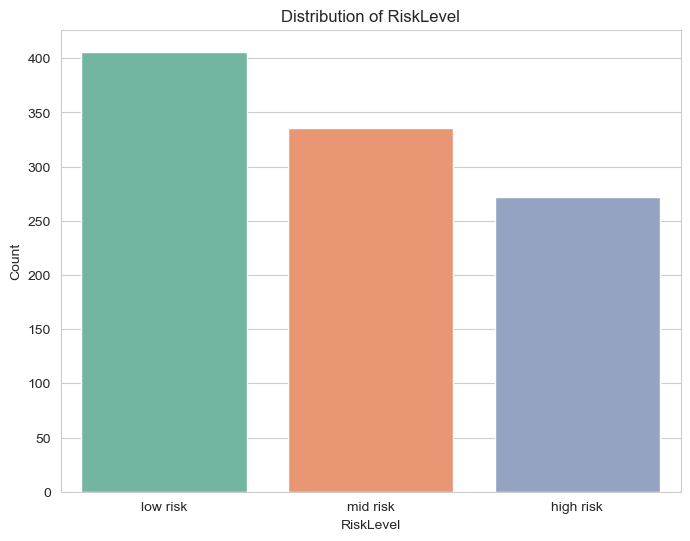

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64


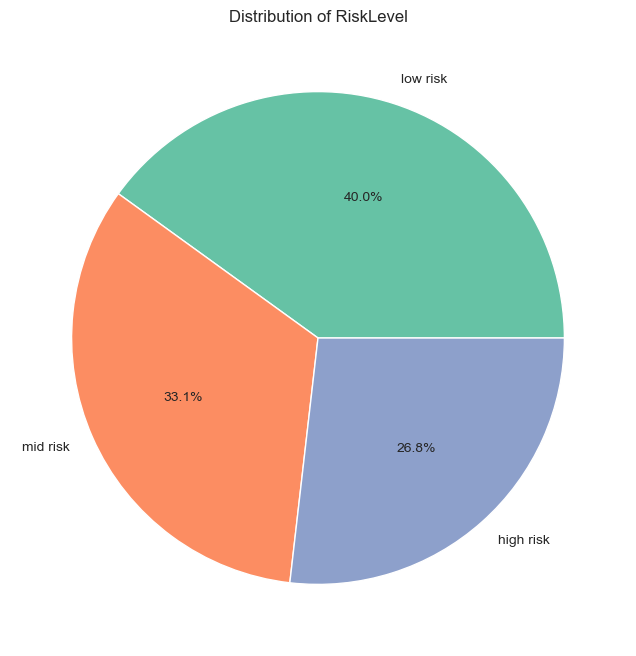

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64


In [42]:
#Target variable (RiskLevel) distribution

# Count the occurrences of each RiskLevel category
risklevel_counts = mymatern['RiskLevel'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=risklevel_counts.index, y=risklevel_counts.values, palette='Set2')
plt.title('Distribution of RiskLevel')
plt.xlabel('RiskLevel')
plt.ylabel('Count')
plt.show()
print(risklevel_counts)


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(risklevel_counts, labels=risklevel_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of RiskLevel')
plt.show()

print(risklevel_counts)

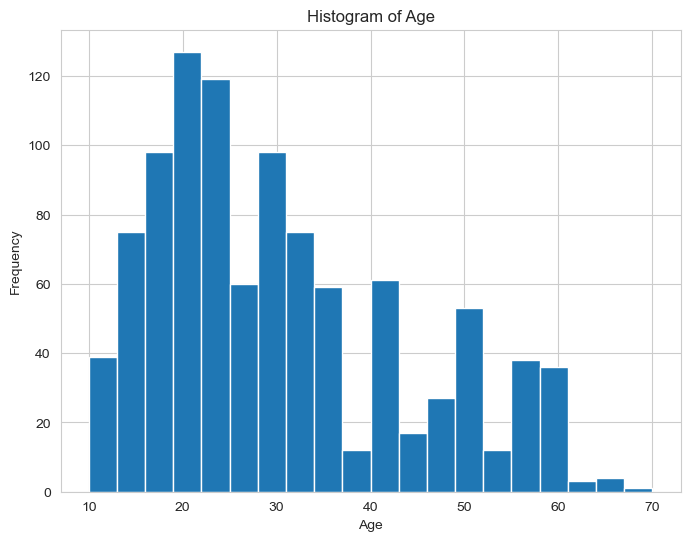

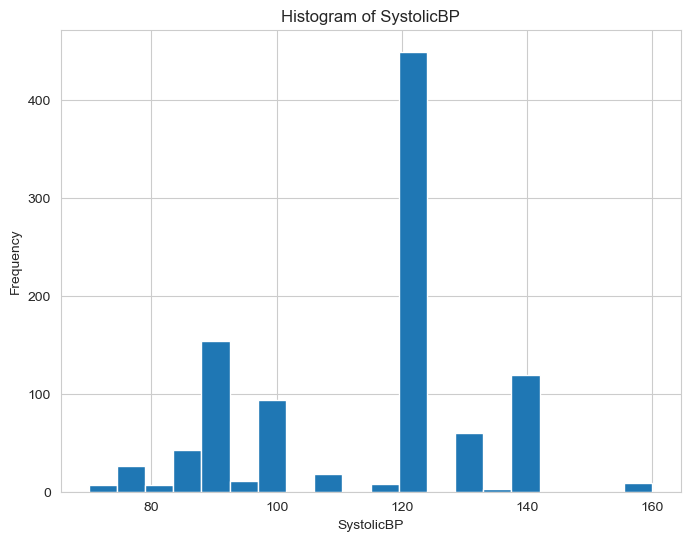

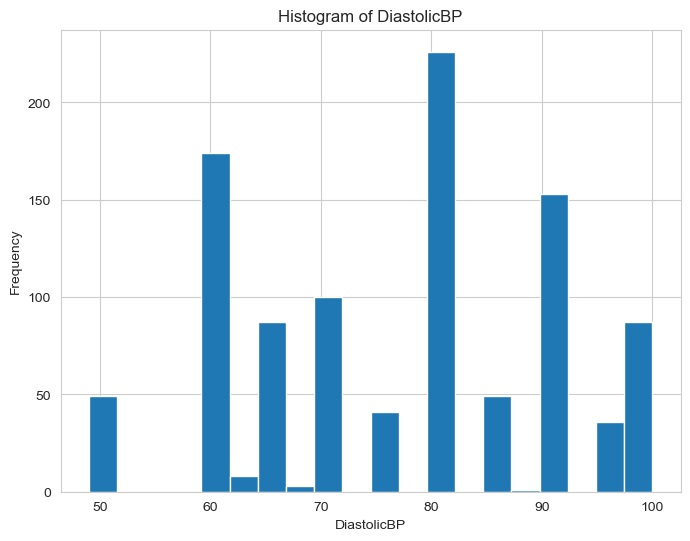

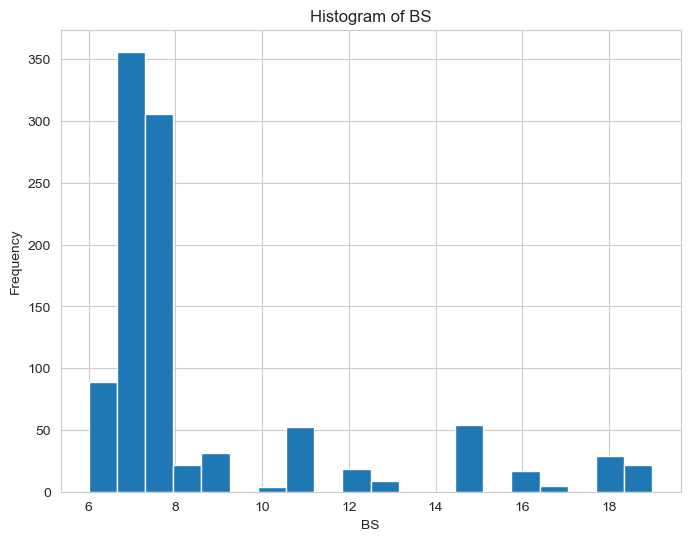

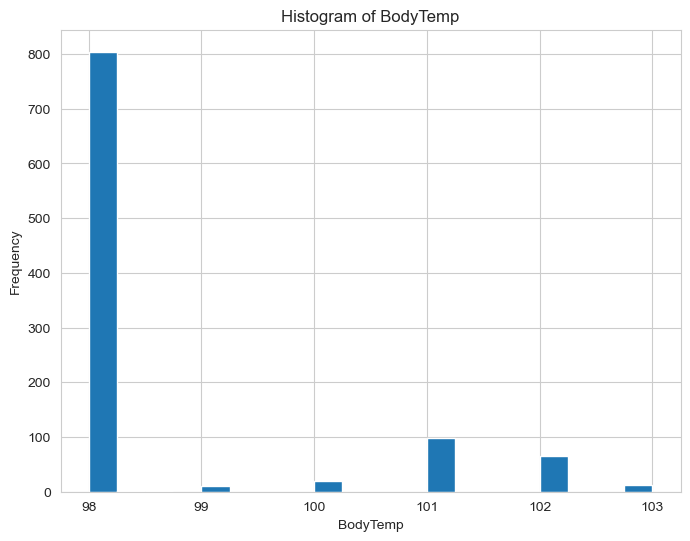

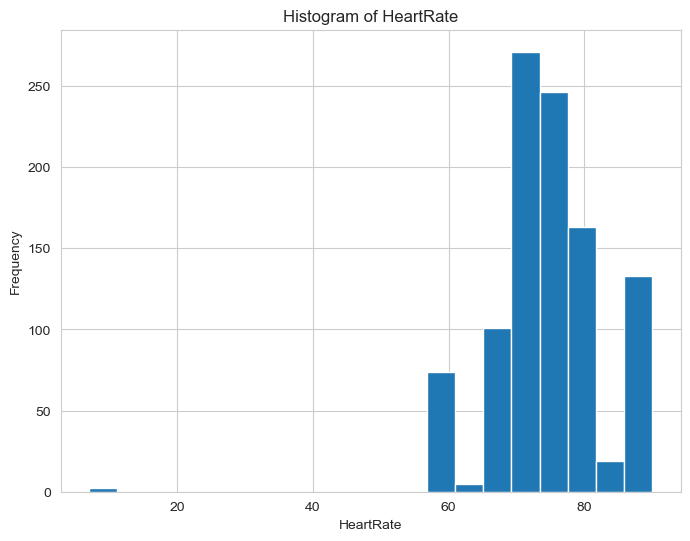

In [43]:
#Histogram
# Loop through numerical columns and create individual histograms
for column in numerical_cols:
    plt.figure(figsize=(8, 6))  # Set the figure size as needed
    plt.hist(mymatern[column], bins=20)  # You can adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column) 
    plt.ylabel('Frequency')
    plt.grid(True)  # Add a grid to the plot if desired
    plt.show()


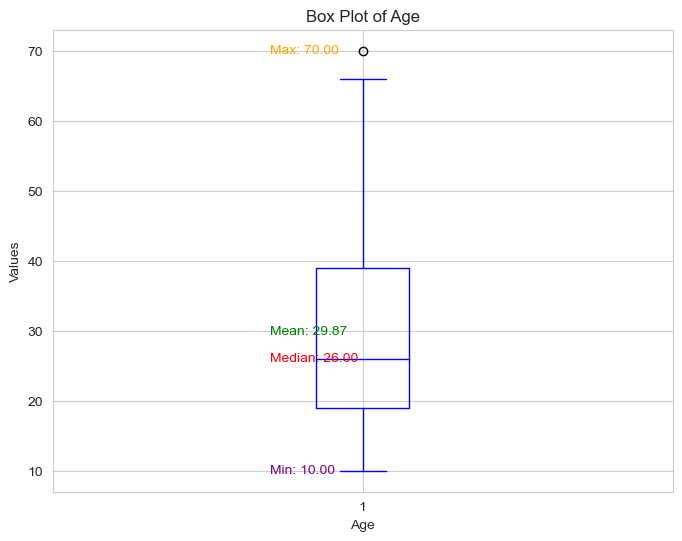

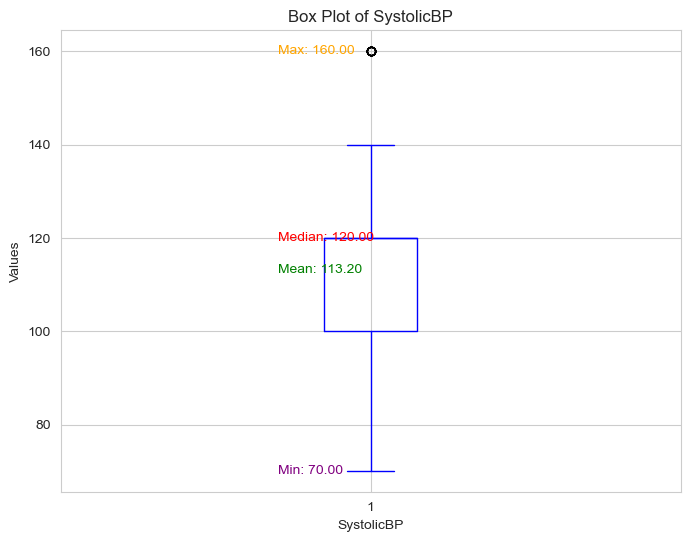

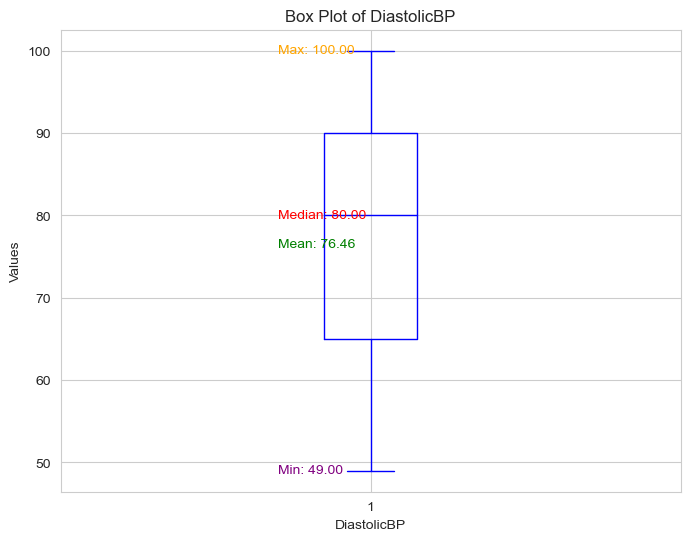

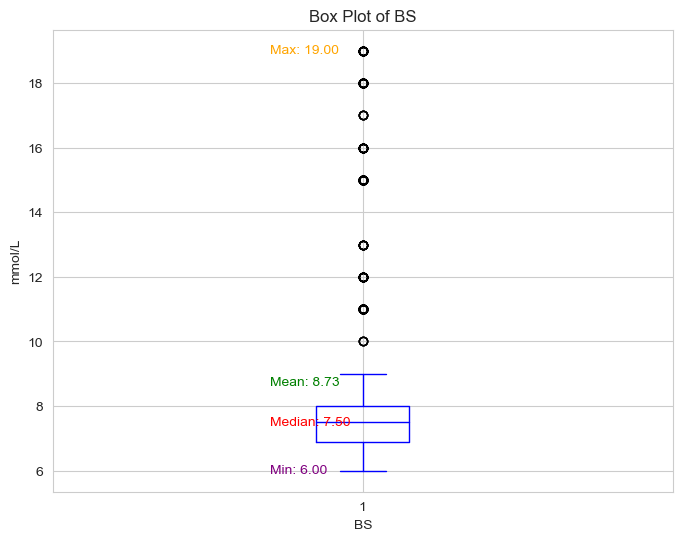

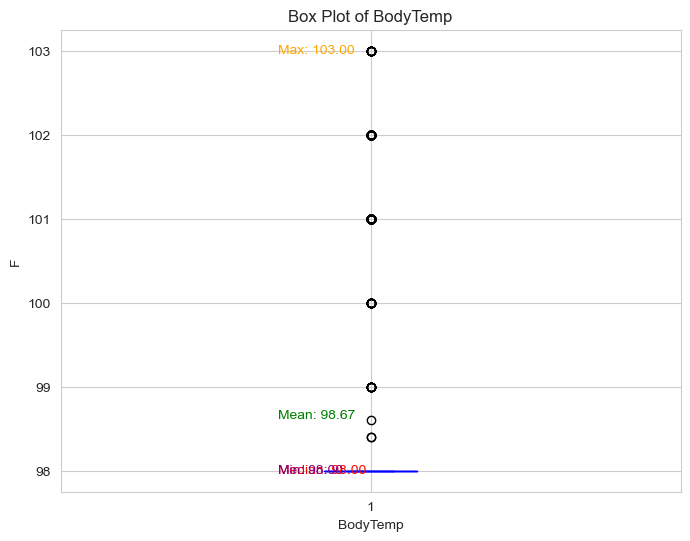

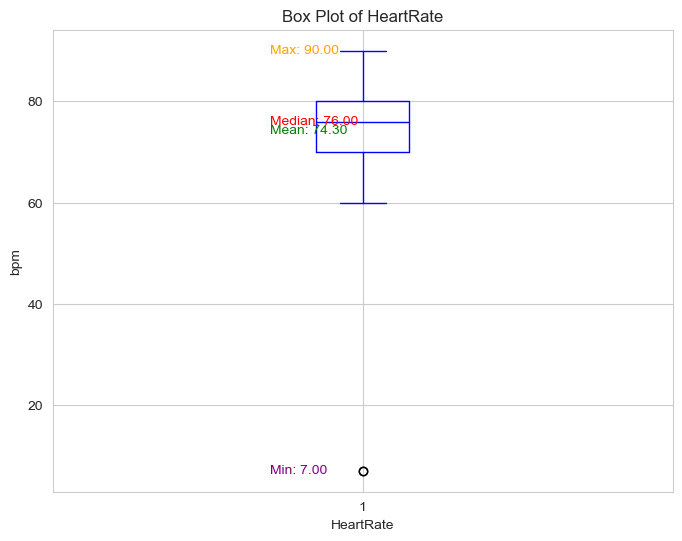

In [46]:
#Boxplot for each numerical column

custom_labels = {

    "BS":"mmol/L",
    "BodyTemp":"F",
    "HeartRate":"bpm",
   
   }

# Create an empty legend list
legend_elements = []

# Loop through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    
    # Create a box plot for the current column
    box = plt.boxplot(mymatern[col].dropna())
    
    # Extract data for median, mean, min, and max
    median = np.median(mymatern[col].dropna())
    mean = mymatern[col].mean()
    min_value = mymatern[col].min()
    max_value = mymatern[col].max()
    
    # Customize boxplot colors
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box[element], color='blue')
    
    # Mark median, mean, min, and max values with colored labels
    plt.text(0.85, median, f'Median: {median:.2f}', verticalalignment='center', color='red')
    plt.text(0.85, mean, f'Mean: {mean:.2f}', verticalalignment='center', color='green')
    plt.text(0.85, min_value, f'Min: {min_value:.2f}', verticalalignment='center', color='purple')
    plt.text(0.85, max_value, f'Max: {max_value:.2f}', verticalalignment='center', color='orange')
    
    # Add the legend elements for mean, median, min, and max
    legend_elements.append(plt.Line2D([0], [0], color='red', label='Median'))
    legend_elements.append(plt.Line2D([0], [0], color='green', label='Mean'))
    legend_elements.append(plt.Line2D([0], [0], color='purple', label='Min'))
    legend_elements.append(plt.Line2D([0], [0], color='orange', label='Max'))
    
    # Customize the plot title and labels
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel(custom_labels.get(col, "Values")) 
    
   
    
    # Show the plot for the current column
    plt.show()


In [ ]:
#????? Grouped scatterplot of pairwise relationships colored by 'RiskLevel'
sns.pairplot(mymatern, hue='RiskLevel', palette='Set1')
plt.suptitle('Pairwise Scatterplot of Numerical Features', y=1.02)
plt.show()


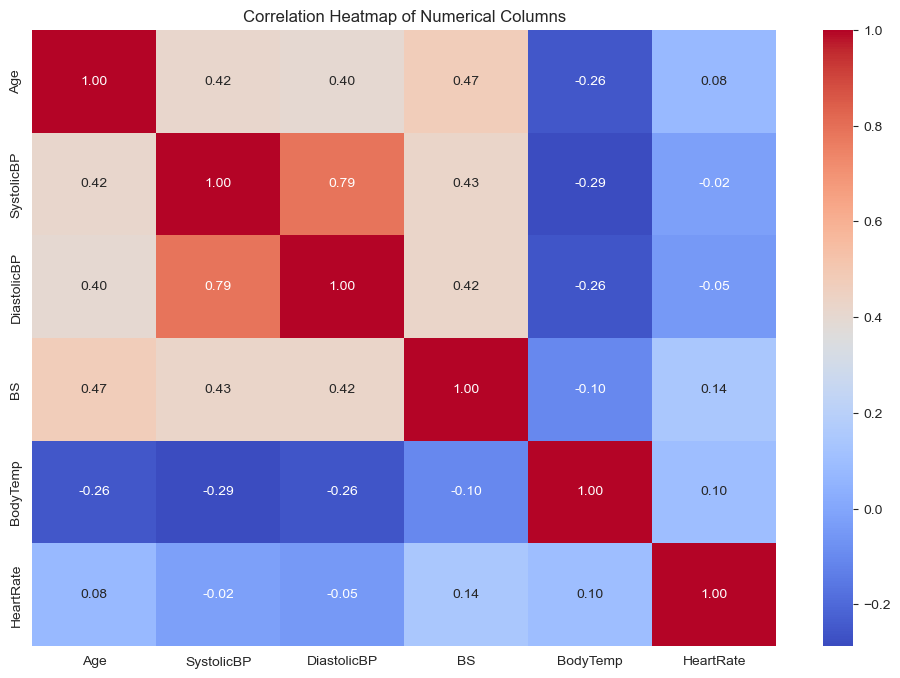

In [48]:
#NOT NEEDED? Calculate the correlation matrix
correlation_matrix = mymatern.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


In [49]:
#Checking for outliers in right and left skewed graphs using IQR

# Calculate IQR for all numerical columns
Q1 = mymatern[numerical_cols].quantile(0.25)
Q3 = mymatern[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 * IQR)
threshold = 1.5 * IQR

# Count outliers for all numerical columns
outliers = (mymatern[numerical_cols] < (Q1 - threshold)) | (mymatern[numerical_cols] > (Q3 + threshold))
outlier_count = outliers.sum()

# Print the number of outliers for each column
print("Number of outliers in each \nnumerical column using IQR method:\n\n")
print(outlier_count)


Number of outliers in each 
numerical column using IQR method:


Age              1
SystolicBP      10
DiastolicBP      0
BS             210
BodyTemp       210
HeartRate        2
dtype: int64


In [50]:
#Checking for outliers in normal distrubuted graphs using zscore

z_scores = stats.zscore(mymatern[numerical_cols])
# Set a Z-score threshold for outlier detection
z_score_threshold = 2
# Create a mask for outlier detection
outlier_mask = z_scores > z_score_threshold

outlier_count = outlier_mask.sum()
# Set options to display more rows and columns
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
print("Indices of outliers detected using z-score:")
print(outlier_count)
print(outlier_mask)

Indices of outliers detected using z-score:
Age            44
SystolicBP     10
DiastolicBP     0
BS             73
BodyTemp       79
HeartRate       0
dtype: int64
        Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate
0     False       False        False  False     False      False
1     False       False        False  False     False      False
2     False       False        False  False     False      False
3     False       False        False  False     False      False
4     False       False        False  False     False      False
5     False       False        False  False     False      False
6     False       False        False  False     False      False
7     False       False        False  False      True      False
8     False       False        False  False     False      False
9     False       False        False   True     False      False
10    False       False        False  False     False      False
11    False       False        False  False     False  

In [60]:
#Remove outliers for heart rate
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = mymatern['HeartRate'].quantile(0.25)
Q3 = mymatern['HeartRate'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask to identify outliers based on IQR bounds
outlier_mask = (mymatern['HeartRate'] < lower_bound) | (mymatern['HeartRate'] > upper_bound)

# Filter dataset to remove outliers
mymatern_no_outliers = mymatern[~outlier_mask]

# Optional: View summary statistics after removing outliers
print("Summary Statistics after Removing Outliers:")
print(mymatern_no_outliers['HeartRate'].describe())

Summary Statistics after Removing Outliers:
count    1012.000000
mean       74.434783
std         7.521857
min        60.000000
25%        70.000000
50%        76.000000
75%        80.000000
max        90.000000
Name: HeartRate, dtype: float64


In [ ]:
#Scatterplot- Use pairplot or PairGrid to show the pairwise relationship of  measurements for each Risk Level
#Set seaborn style
sns.set_style("whitegrid")

# Create pairwise scatterplot (pairplot)
sns.pairplot(mymatern, hue="RiskLevel", height=3, diag_kind="kde", markers=["o", "s", "D"], palette="Set1")

# Display plot
plt.show()

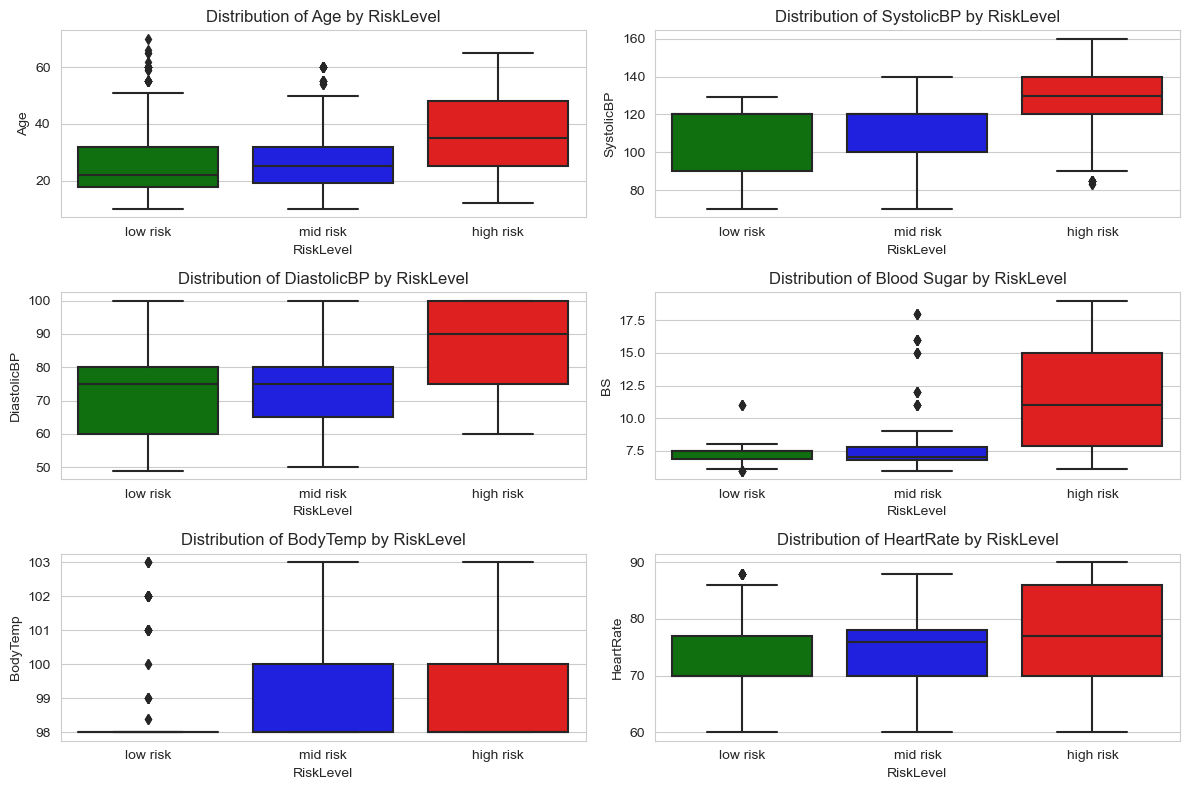

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace this with your actual dataset loading code)
# mymatern = pd.read_csv("path_to_your_dataset.csv")

# Calculate quartiles and IQR for HeartRate
Q1 = mymatern['HeartRate'].quantile(0.25)
Q3 = mymatern['HeartRate'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers for HeartRate
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers in HeartRate
mymatern_no_outliers = mymatern[(mymatern['HeartRate'] >= lower_bound) & (mymatern['HeartRate'] <= upper_bound)]

# Select only numerical columns (excluding 'RiskLevel')
numerical_columns = mymatern_no_outliers.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set the order of RiskLevel categories
risk_level_order = ["low risk", "mid risk", "high risk"]

# Define custom colors for each RiskLevel
risk_level_colors = {"low risk": "green", "mid risk": "blue", "high risk": "red"}

# Set seaborn style
sns.set_style("whitegrid")

# Create boxplots for each numerical column by RiskLevel with custom colors
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)  # Create subplots
    sns.boxplot(x='RiskLevel', y=column, data=mymatern_no_outliers, order=risk_level_order, palette=risk_level_colors)
    
    # Customize the title for the Blood Sugar (BS) column
    if column == 'BS':
        plt.title('Distribution of Blood Sugar by RiskLevel')
    else:
        plt.title(f'Distribution of {column} by RiskLevel')
    
    plt.xlabel('RiskLevel')
    plt.ylabel(column)
    plt.tight_layout()  # Adjust subplot layout

plt.show()


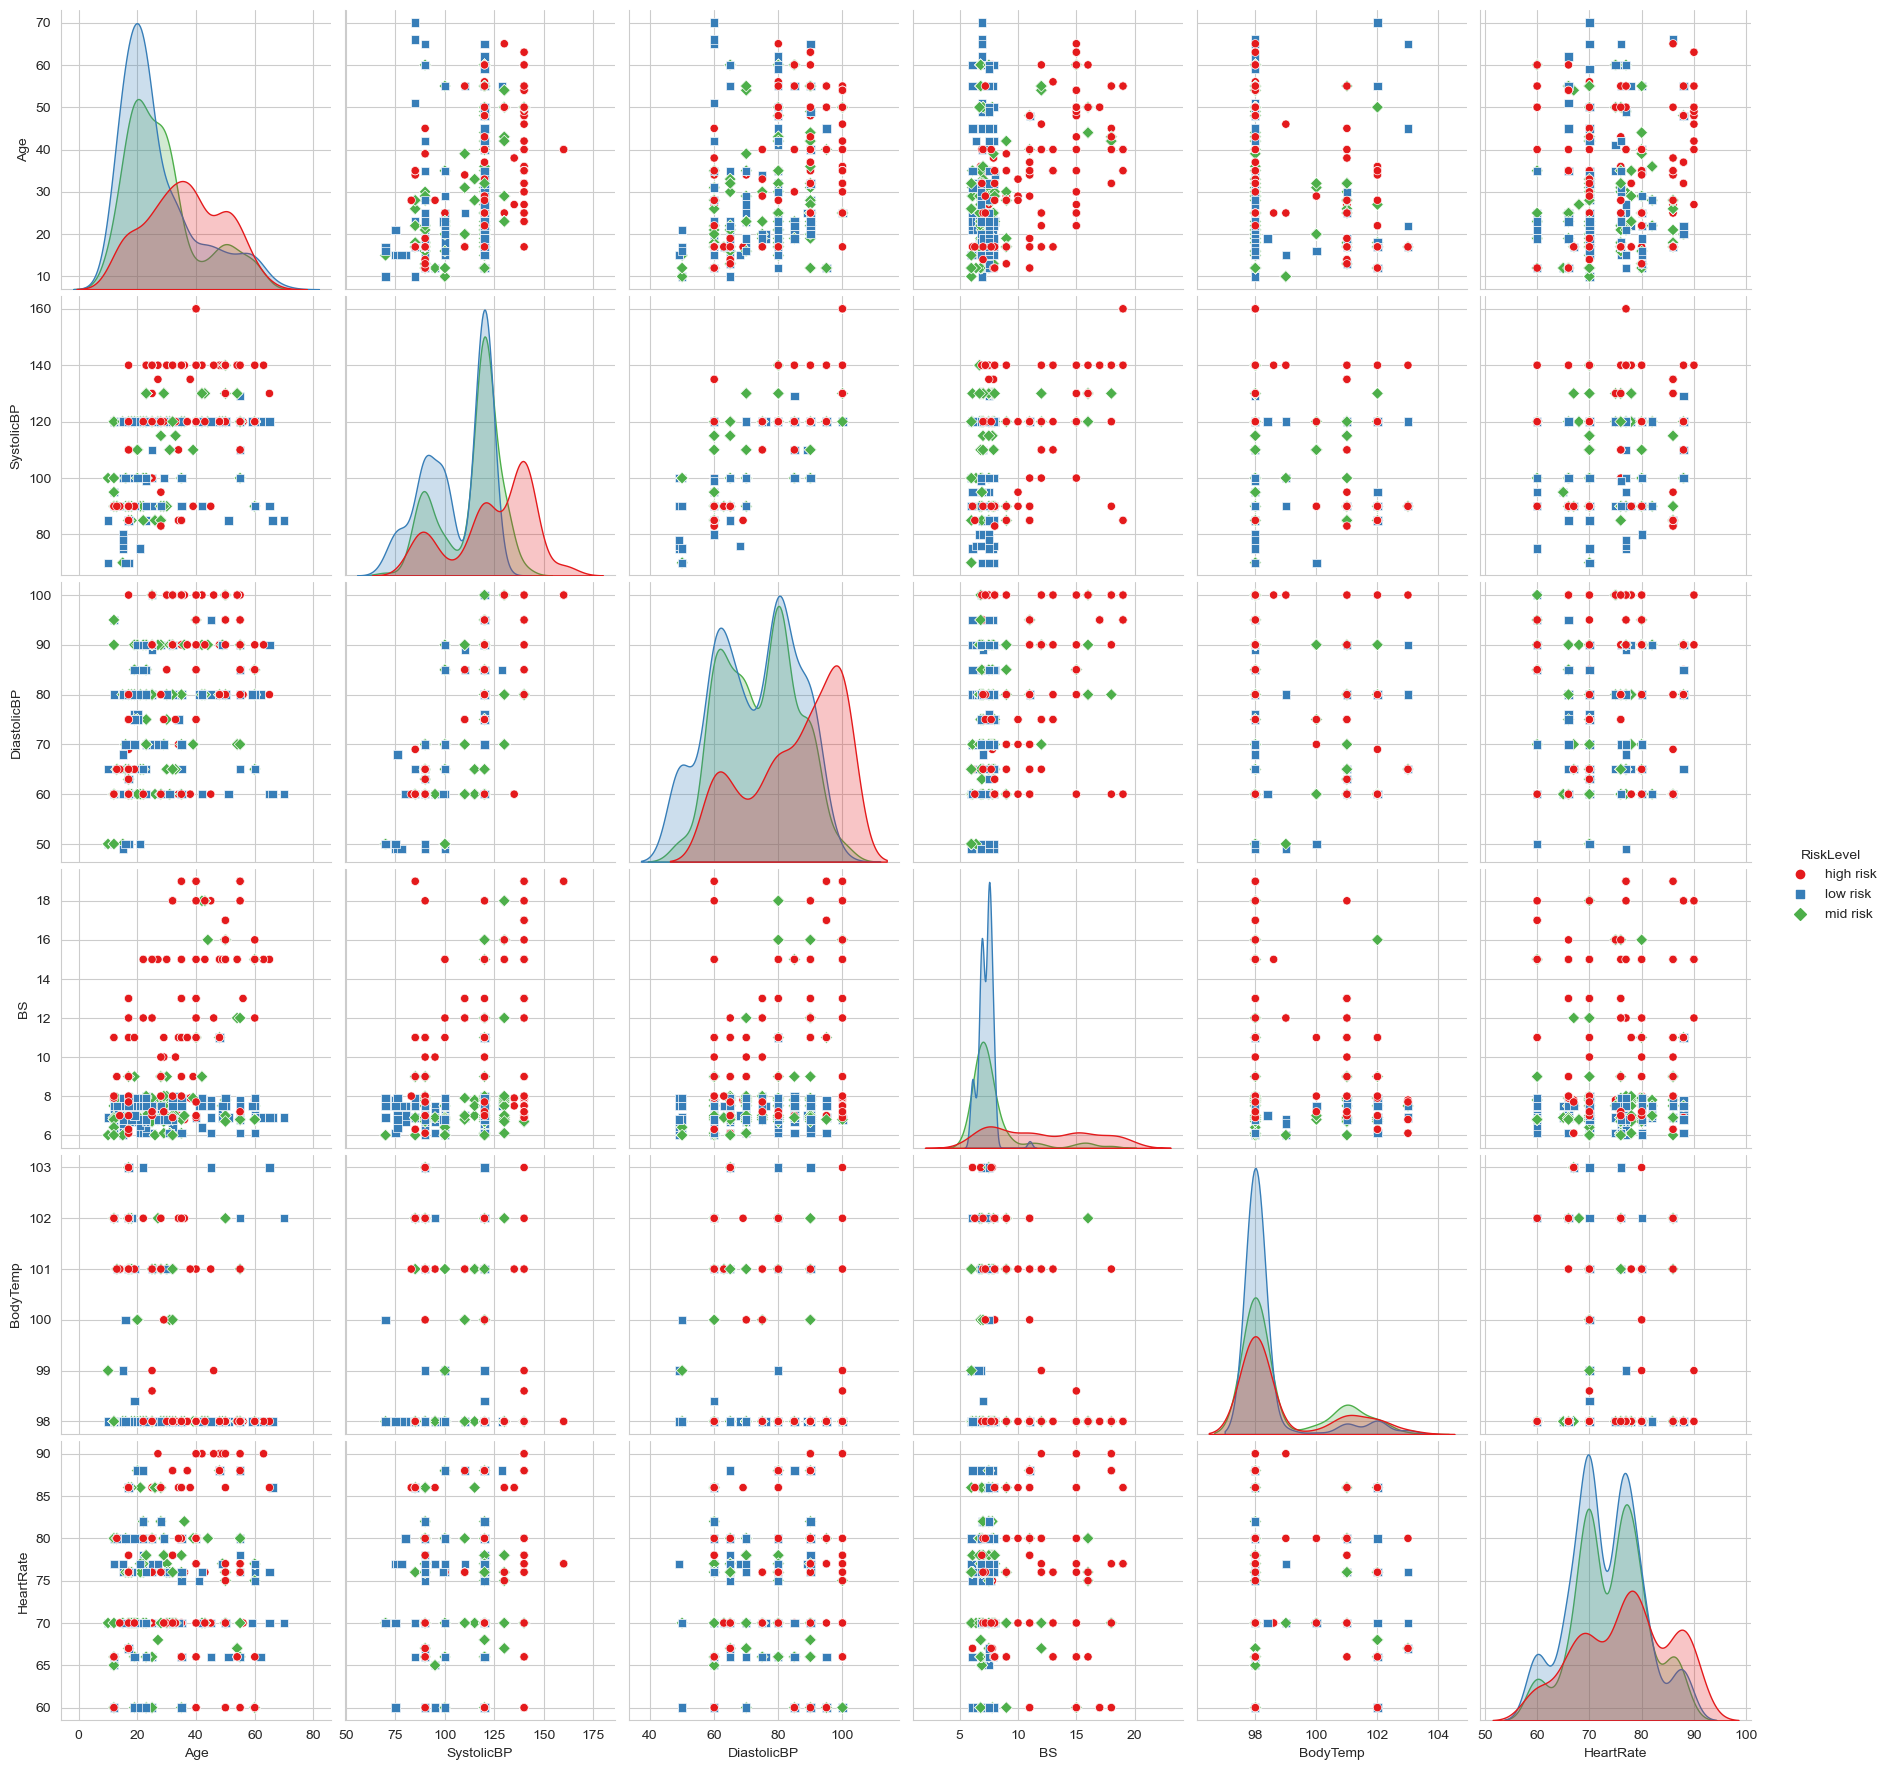

In [68]:
#PAIRPLOT TO SHOW RELATIONSHIP BETWEEN FEATURES (W/O OUTLIERS)
# Set seaborn style
sns.set_style("whitegrid")

# Create pairwise scatterplot (pairplot) after outlier removal
sns.pairplot(mymatern_no_outliers, hue="RiskLevel", height=3, diag_kind="kde", markers=["o", "s", "D"], palette="Set1")

# Display plot
plt.show()


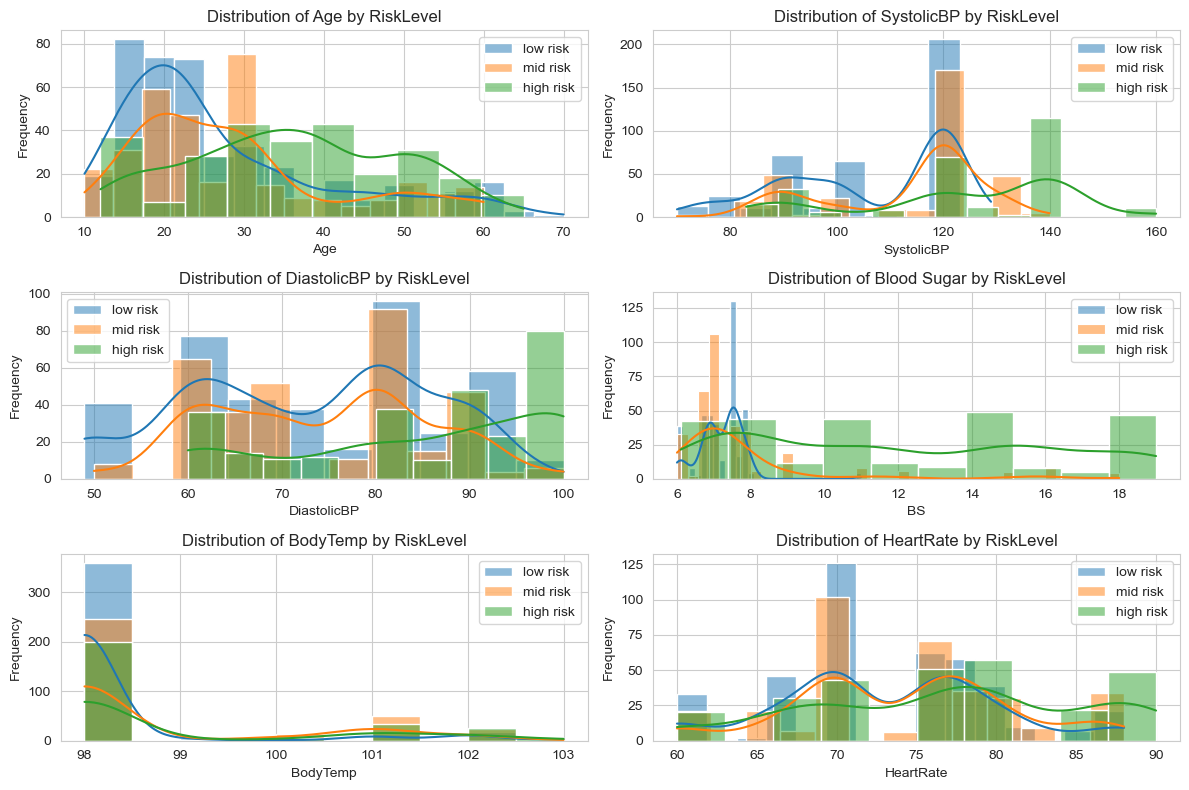

In [71]:
# Create histograms for each numerical column by RiskLevel (after outlier removal)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)  # Create subplots
    for risk_level in risk_level_order:
        sns.histplot(mymatern_no_outliers[mymatern_no_outliers['RiskLevel'] == risk_level][column], label=risk_level, kde=True, alpha=0.5)
    
    # Customize the title for the Blood Sugar (BS) column
    if column == 'BS':
        plt.title('Distribution of Blood Sugar by RiskLevel')
    else:
        plt.title(f'Distribution of {column} by RiskLevel')
    
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()  # Adjust subplot layout

plt.show()

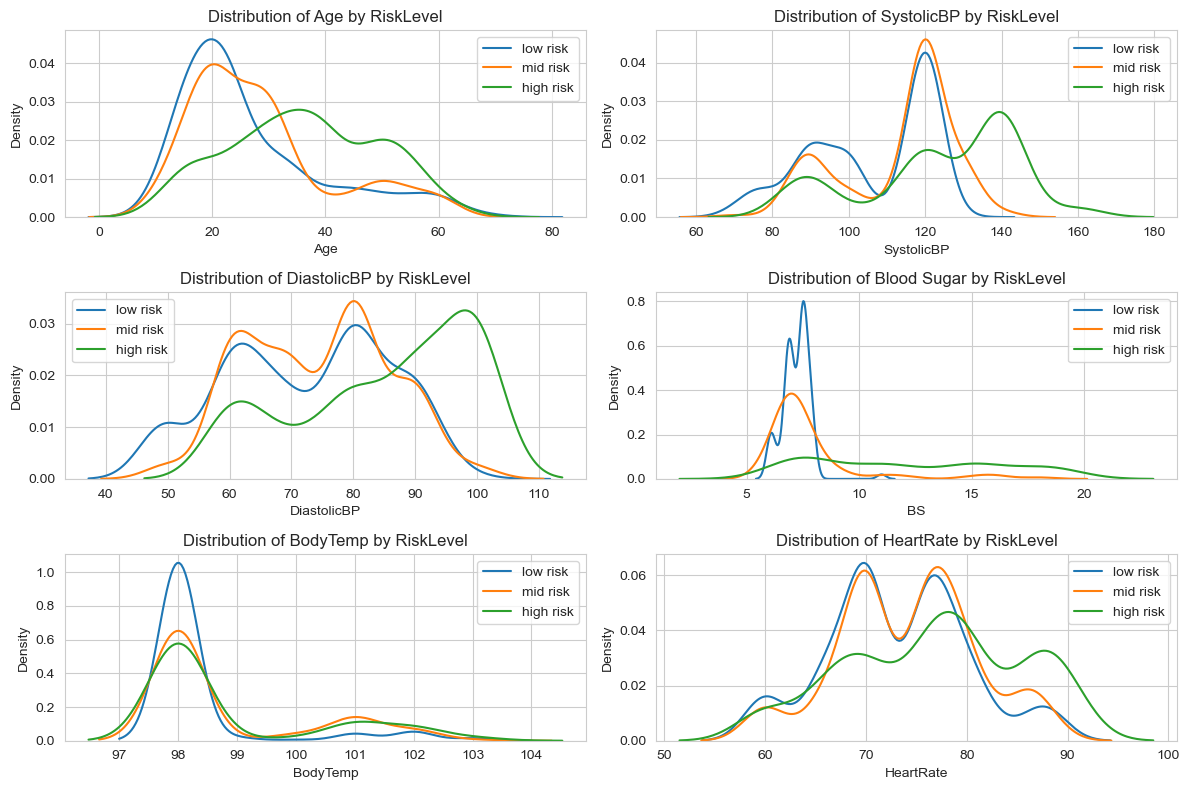

In [72]:
# Create KDE plots for each numerical column by RiskLevel (after outlier removal)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)  # Create subplots
    for risk_level in risk_level_order:
        sns.kdeplot(mymatern_no_outliers[mymatern_no_outliers['RiskLevel'] == risk_level][column], label=risk_level)
    
    # Customize the title for the Blood Sugar (BS) column
    if column == 'BS':
        plt.title('Distribution of Blood Sugar by RiskLevel')
    else:
        plt.title(f'Distribution of {column} by RiskLevel')
    
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()  # Adjust subplot layout

plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load your dataset and prepare features (X) and target variable (y)
# Replace X and y with your dataset's features and target variable

# Step 1: Create a Model Using Decision Tree Algorithm

# Instantiate Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Evaluate initial model with 10-fold cross-validation
initial_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

# Plot initial accuracy scores
plt.plot(range(1, 11), initial_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Initial Model Accuracy Across 10 Folds')
plt.show()

# Step 2: Adjust Parameters and Improve Model

# Adjust max_depth parameter
dt_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
scores_depth = cross_val_score(dt_depth, X, y, cv=10, scoring='accuracy')

# Plot accuracy scores with adjusted max_depth
plt.plot(range(1, 11), scores_depth, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Max Depth = 5 Across 10 Folds')
plt.show()

# Adjust min_samples_split parameter
dt_split = DecisionTreeClassifier(min_samples_split=10, random_state=42)
scores_split = cross_val_score(dt_split, X, y, cv=10, scoring='accuracy')

# Plot accuracy scores with adjusted min_samples_split
plt.plot(range(1, 11), scores_split, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Min Samples Split = 10 Across 10 Folds')
plt.show()

# Step 3: Describe the Final Optimized Classification Tree

# Fit final optimized model with best parameters
final_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
final_dt.fit(X, y)

# Describe the structure of the final optimized tree
print(f"Final Optimized Decision Tree Structure (Max Depth = 5, Min Samples Split = 10):\n")
print(f"Number of Nodes: {final_dt.tree_.node_count}")
print(f"Tree Depth: {final_dt.tree_.max_depth}")


NameError: name 'X' is not defined

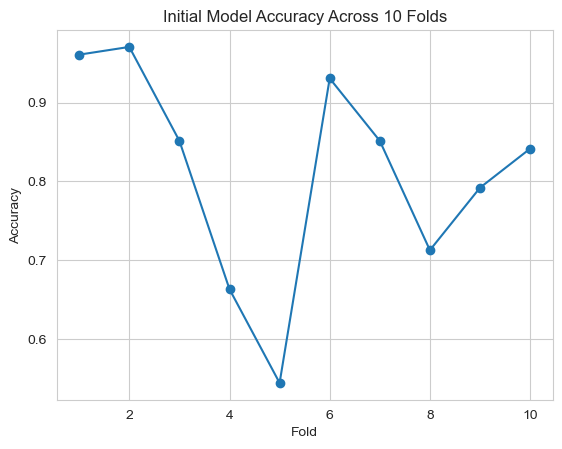

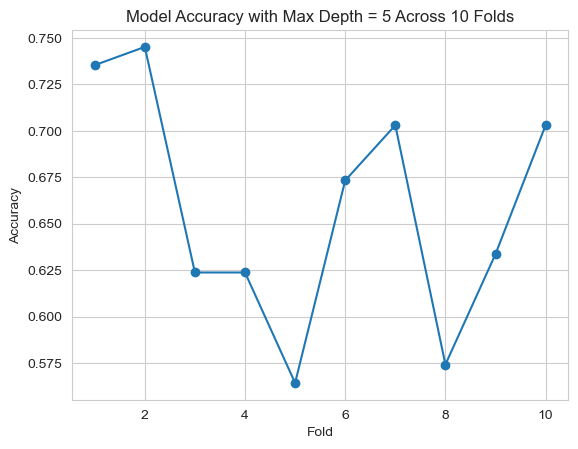

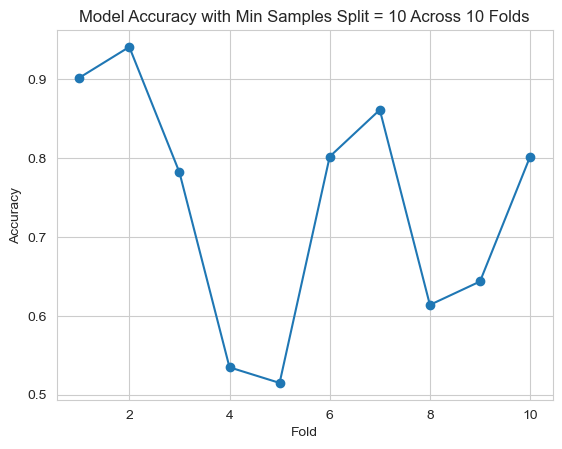

Final Optimized Decision Tree Structure (Max Depth = 5, Min Samples Split = 10):

Number of Nodes: 33
Tree Depth: 5


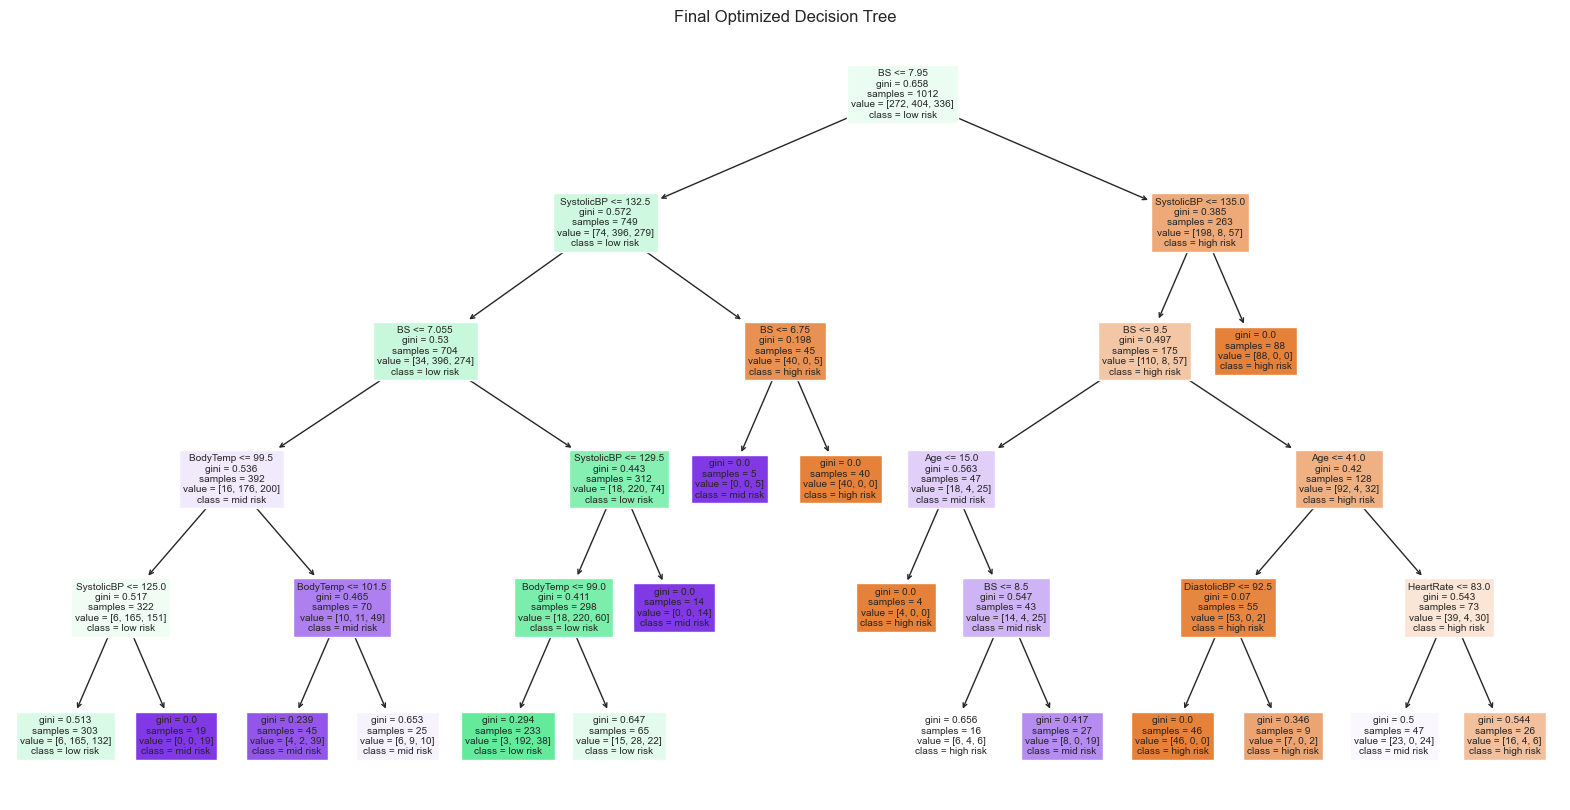

In [80]:
# Prepare features (X) and target variable (y) after outlier removal
X = mymatern_no_outliers.drop(columns=['RiskLevel'])  # Assuming 'RiskLevel' is the target variable
y = mymatern_no_outliers['RiskLevel']

# Step 1: Create a Model Using Decision Tree Algorithm

# Instantiate Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Evaluate initial model with 10-fold cross-validation
initial_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

# Plot initial accuracy scores
plt.plot(range(1, 11), initial_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Initial Model Accuracy Across 10 Folds')
plt.show()

# Step 2: Adjust Parameters and Improve Model

# Adjust max_depth parameter
dt_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
scores_depth = cross_val_score(dt_depth, X, y, cv=10, scoring='accuracy')

# Plot accuracy scores with adjusted max_depth
plt.plot(range(1, 11), scores_depth, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Max Depth = 5 Across 10 Folds')
plt.show()

# Adjust min_samples_split parameter
dt_split = DecisionTreeClassifier(min_samples_split=10, random_state=42)
scores_split = cross_val_score(dt_split, X, y, cv=10, scoring='accuracy')

# Plot accuracy scores with adjusted min_samples_split
plt.plot(range(1, 11), scores_split, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Min Samples Split = 10 Across 10 Folds')
plt.show()

# Step 3: Describe the Final Optimized Classification Tree

# Fit final optimized model with best parameters
final_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
final_dt.fit(X, y)

# Describe the structure of the final optimized tree
print(f"Final Optimized Decision Tree Structure (Max Depth = 5, Min Samples Split = 10):\n")
print(f"Number of Nodes: {final_dt.tree_.node_count}")
print(f"Tree Depth: {final_dt.tree_.max_depth}")

# Visualize the final Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(final_dt, filled=True, feature_names=X.columns, class_names=final_dt.classes_)
plt.title("Final Optimized Decision Tree")
plt.show()

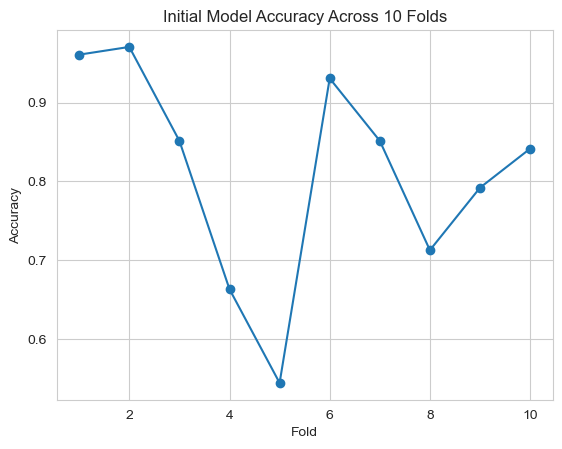

Initial Mean Accuracy: 0.8119491360900796


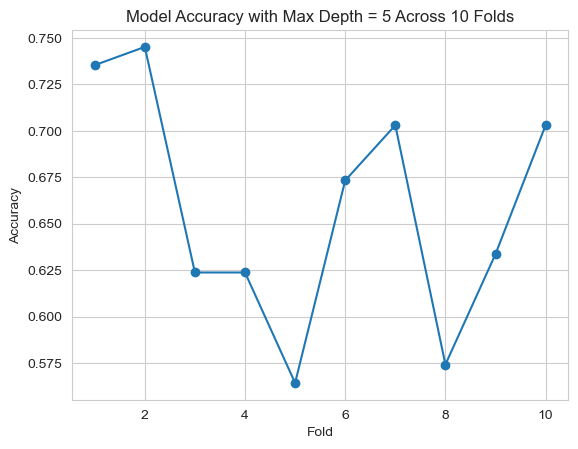

Mean Accuracy with Max Depth = 5: 0.6579402057852843


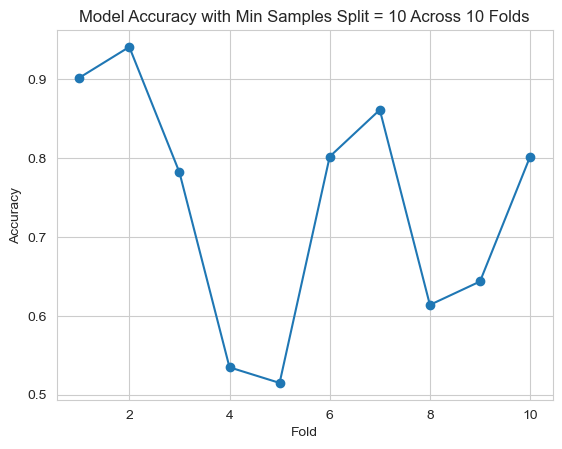

Mean Accuracy with Min Samples Split = 10: 0.7397592700446515
Final Optimized Decision Tree Structure (Max Depth = 5, Min Samples Split = 10):

Number of Nodes: 33
Tree Depth: 5


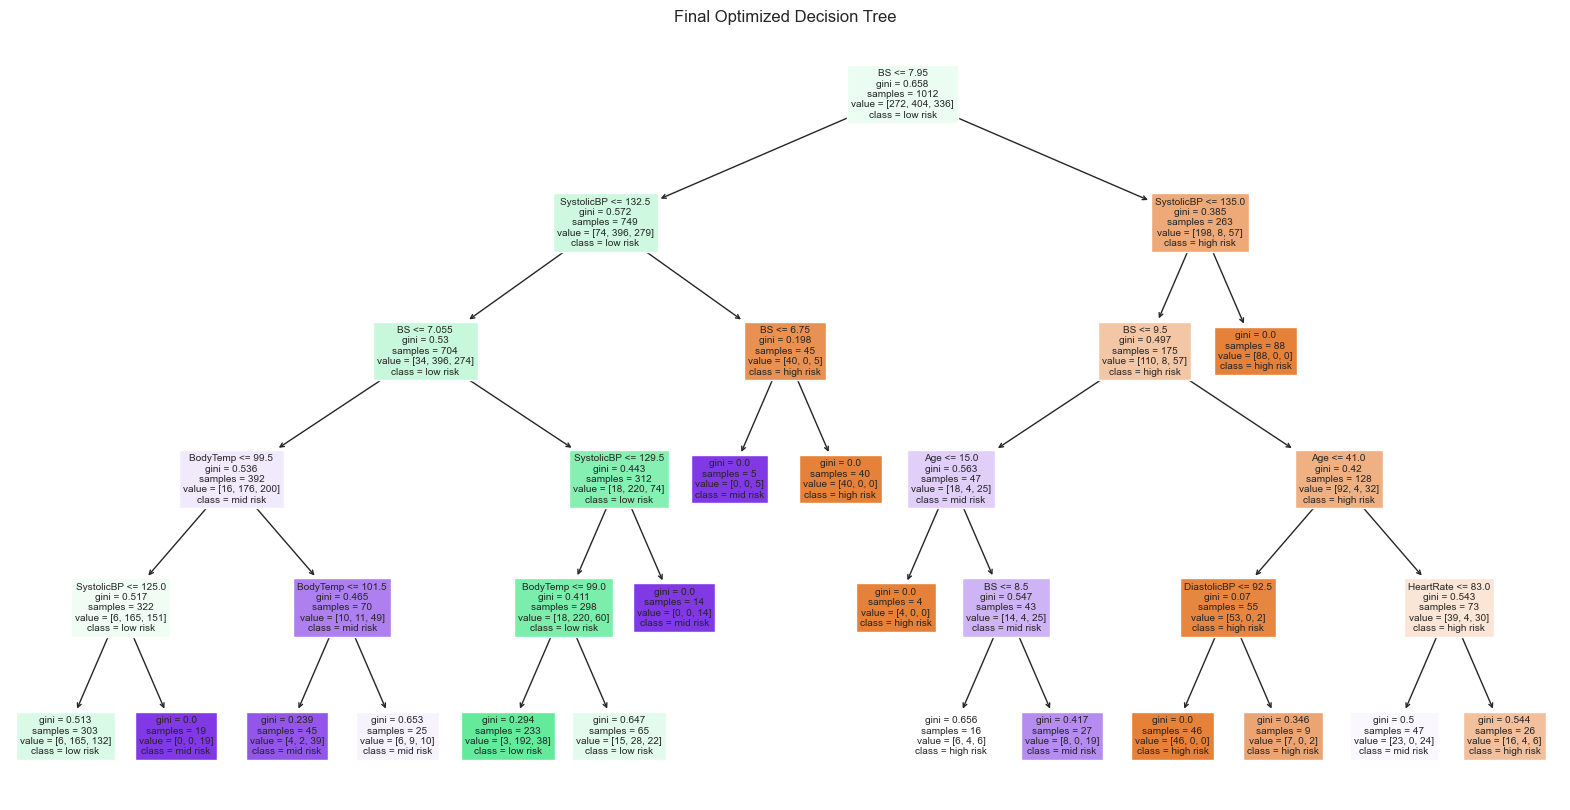

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#prepare features (X) and target variable (y) after outlier removal
X = mymatern_no_outliers.drop(columns=['RiskLevel'])  # Assuming 'RiskLevel' is the target variable
y = mymatern_no_outliers['RiskLevel']

#create a Model Using Decision Tree Algorithm

#instantiate Decision Tree Classifier with default parameters
dt = DecisionTreeClassifier(random_state=42)

#evaluate initial model with 10-fold cross-validation
initial_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

#plot initial accuracy scores
plt.plot(range(1, 11), initial_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Initial Model Accuracy Across 10 Folds')
plt.show()

#report initial mean accuracy
print(f"Initial Mean Accuracy: {initial_scores.mean()}")

#adjust parameters & improve model

#adjust max_depth parameter and evaluate model
dt_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
scores_depth = cross_val_score(dt_depth, X, y, cv=10, scoring='accuracy')

#plot accuracy scores with adjusted max_depth
plt.plot(range(1, 11), scores_depth, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Max Depth = 5 Across 10 Folds')
plt.show()

#adjust min_samples_split parameter and evaluate model
dt_split = DecisionTreeClassifier(min_samples_split=10, random_state=42)
scores_split = cross_val_score(dt_split, X, y, cv=10, scoring='accuracy')

#plot accuracy scores with adjusted min_samples_split
plt.plot(range(1, 11), scores_split, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Min Samples Split = 10 Across 10 Folds')
plt.show()


#describe the Final Optimized Classification Tree

#fit final optimized model with best parameters
final_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
final_dt.fit(X, y)

#describe the structure of the final optimized tree
print(f"Final Optimized Decision Tree Structure (Max Depth = 5, Min Samples Split = 10):\n")
print(f"Number of Nodes: {final_dt.tree_.node_count}")
print(f"Tree Depth: {final_dt.tree_.max_depth}")

#visualize the final Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(final_dt, filled=True, feature_names=X.columns, class_names=final_dt.classes_)
plt.title("Final Optimized Decision Tree")
plt.show()


In [88]:
#print initial accuracy scores
print("Initial Model Accuracy Scores Across 10 Folds:")
for fold, score in enumerate(initial_scores, start=1):
    print(f"Fold {fold}: {score:.4f}")

#adjust max_depth parameter
dt_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
scores_depth = cross_val_score(dt_depth, X, y, cv=10, scoring='accuracy')

#print accuracy scores with adjusted max_depth
print("\nModel Accuracy Scores with Max Depth = 5 Across 10 Folds:")
for fold, score in enumerate(scores_depth, start=1):
    print(f"Fold {fold}: {score:.4f}")

#adjust min_samples_split parameter
dt_split = DecisionTreeClassifier(min_samples_split=10, random_state=42)
scores_split = cross_val_score(dt_split, X, y, cv=10, scoring='accuracy')

# Print accuracy scores with adjusted min_samples_split
print("\nModel Accuracy Scores with Min Samples Split = 10 Across 10 Folds:")
for fold, score in enumerate(scores_split, start=1):
    print(f"Fold {fold}: {score:.4f}")

Initial Model Accuracy Scores Across 10 Folds:
Fold 1: 0.9608
Fold 2: 0.9706
Fold 3: 0.8515
Fold 4: 0.6634
Fold 5: 0.5446
Fold 6: 0.9307
Fold 7: 0.8515
Fold 8: 0.7129
Fold 9: 0.7921
Fold 10: 0.8416

Model Accuracy Scores with Max Depth = 5 Across 10 Folds:
Fold 1: 0.7353
Fold 2: 0.7451
Fold 3: 0.6238
Fold 4: 0.6238
Fold 5: 0.5644
Fold 6: 0.6733
Fold 7: 0.7030
Fold 8: 0.5743
Fold 9: 0.6337
Fold 10: 0.7030

Model Accuracy Scores with Min Samples Split = 10 Across 10 Folds:
Fold 1: 0.9020
Fold 2: 0.9412
Fold 3: 0.7822
Fold 4: 0.5347
Fold 5: 0.5149
Fold 6: 0.8020
Fold 7: 0.8614
Fold 8: 0.6139
Fold 9: 0.6436
Fold 10: 0.8020


Feature Importance Scores:
       Feature  Importance
3           BS    0.573822
1   SystolicBP    0.282968
4     BodyTemp    0.091887
0          Age    0.042570
5    HeartRate    0.006358
2  DiastolicBP    0.002395


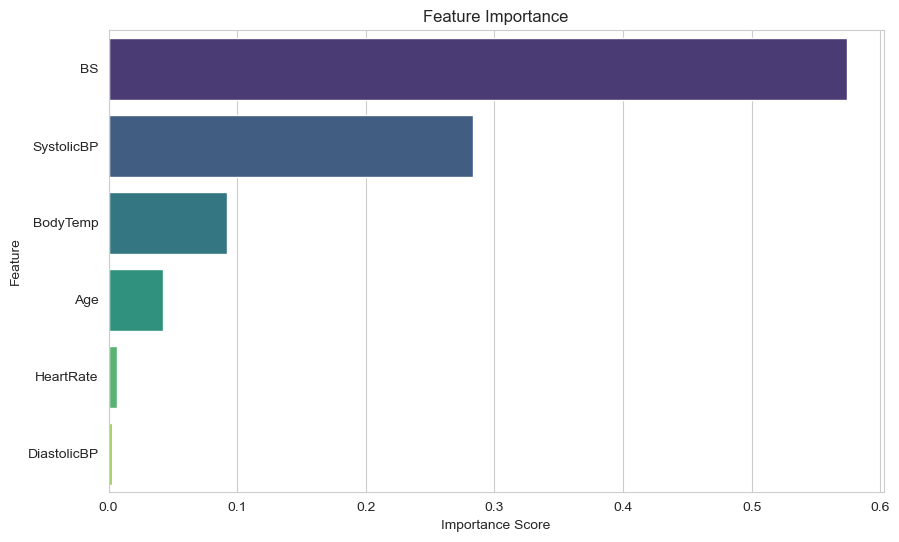

In [89]:
#Find feature importance

#train the final optimized DecisionTreeClassifier model
final_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
final_dt.fit(X, y)  # Assuming X and y are your features and target variable

#get feature importance scores
feature_importance = final_dt.feature_importances_

#create DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#display the feature importance scores
print("Feature Importance Scores:")
print(importance_df)

#plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


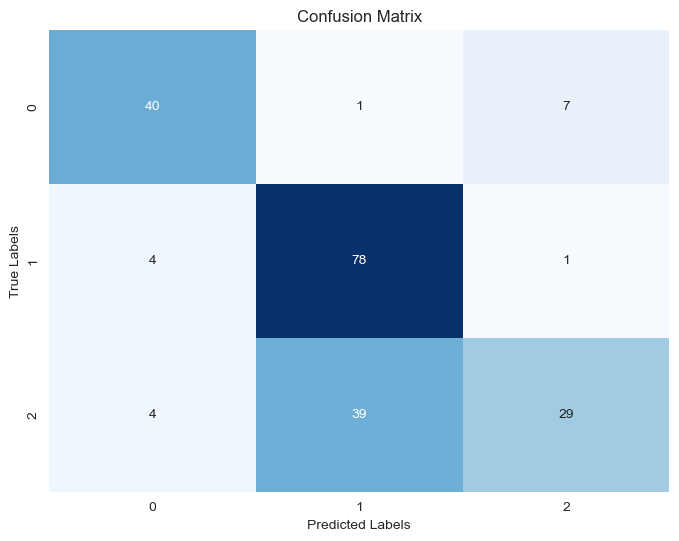

Model Summary Report:
              precision    recall  f1-score   support

   high risk       0.83      0.83      0.83        48
    low risk       0.66      0.94      0.78        83
    mid risk       0.78      0.40      0.53        72

    accuracy                           0.72       203
   macro avg       0.76      0.73      0.71       203
weighted avg       0.75      0.72      0.70       203



<Figure size 800x600 with 0 Axes>

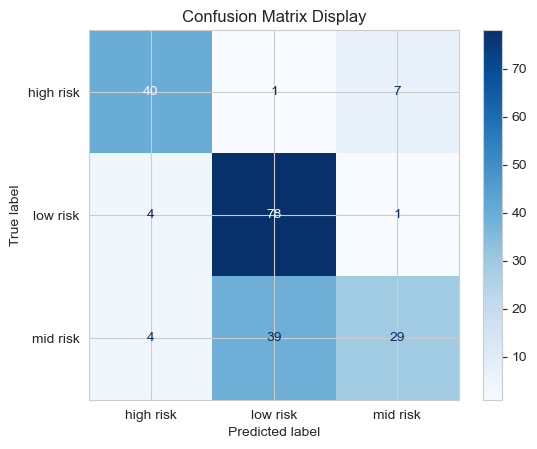

In [93]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


#assuming X and y are your features and target variable after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#generate Confusion Matrix and Evaluate Model
y_pred = final_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

#plot Confusion Matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#display Model Summary Report
print("Model Summary Report:")
print(report)

#visualize Confusion Matrix using ConfusionMatrixDisplay
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_dt.classes_)
plt.figure(figsize=(8, 6))
confusion_matrix_display.plot(cmap='Blues')
plt.title('Confusion Matrix Display')
plt.show()
